In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [2]:
yuto_df = pd.read_csv('yuto.csv')
contest_df = pd.read_csv('yutocontest.csv')

### Cleaning data

In [3]:
# remove whitespaces
yuto_df = yuto_df.map(lambda x: x.strip() if isinstance(x, str) else x)
contest_df = contest_df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [4]:
# remove bails from contest_df
# drop bails 
contest_df = contest_df.drop(contest_df[contest_df.score == 0].index)

### Colors used 

In [5]:
smoky = '#62566e'
bouqet = '#a2799d'
careyspink = '#d5a5b6'
bizarre = '#f1dcd8'
mauve = '#E0B0FF'
lavender = '#E6E6FA'
lily = '#C5A1AF'
londonhue = '#B09BA9'
chatelle = '#A999AA'

# ====================

# Street Tricks

In [6]:
# tricks repeated more than once 
yuto_df['name'].value_counts()[:25];

In [7]:
tricks = yuto_df['name'].value_counts()[:25].index.tolist()
counts = yuto_df['name'].value_counts()[:25].tolist()

# remove idk lol
tricks.pop(0);
counts.pop(0);

# reorder ollie because 3/5 ollies were to set up for a trick
tricks.pop(0);
counts.pop(0);

tricks.append('ollie')
counts.append(2)

# replace trick names to suicu
i = tricks.index('nollie fs 180 to sw bs 5-0 to reg')
tricks[i] = 'nollie fs suciu'

i = tricks.index('nollie bs 180 to sw fs 5-0 to reg')
tricks[i] = 'nollie bs suciu'

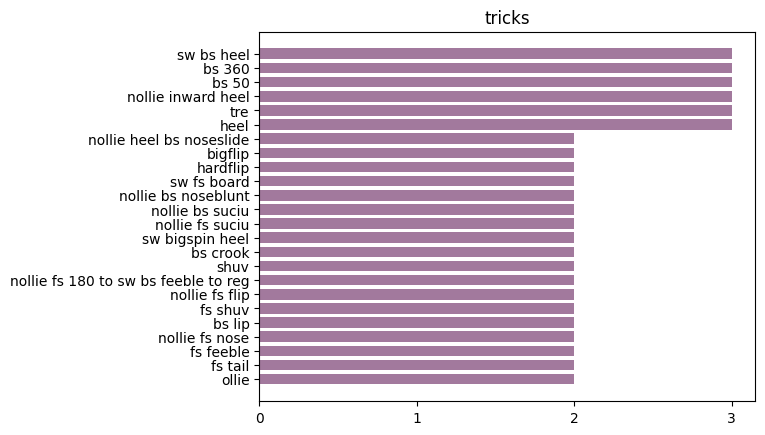

In [8]:
fig, ax = plt.subplots()

ax.barh(tricks, counts, height=0.75, color=bouqet)
ax.set_yticks(tricks, labels=tricks)
ax.invert_yaxis()
# ax.set_xlabel('Count')
ax.set_title('tricks')
ax.set_xticks([0, 1, 2, 3])


plt.savefig('tricks.jpg', bbox_inches='tight')

In [9]:
total_streettricks = len(yuto_df['name'])
print(f'Total Tricks: {total_streettricks}')
print(f'Repeated more than once: {24} tricks')
print(f'Tricks done once: {(total_streettricks-24)/total_streettricks*100}% tricks')

Total Tricks: 150
Repeated more than once: 24 tricks
Tricks done once: 84.0% tricks


# Obstacles

In [10]:
street_rail = len(yuto_df[yuto_df['obstacle'] == 'rail'])
street_gap = len(yuto_df[yuto_df['obstacle'] == 'gap'])
street_ledge = len(yuto_df[yuto_df['obstacle'] == 'ledge'])
street_flat = len(yuto_df[yuto_df['obstacle'] == 'flat'])
street_transition = len(yuto_df[yuto_df['obstacle'] == 'transition'])
street_manual = len(yuto_df[yuto_df['obstacle'] == 'manual'])

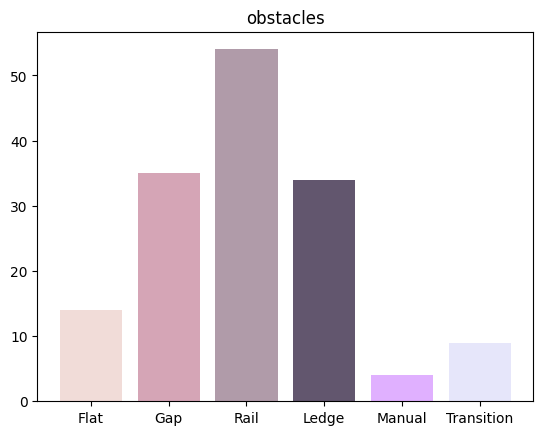

In [11]:
fig, ax = plt.subplots()

obstacles = ['Flat', 'Gap', 'Rail', 'Ledge', 'Manual', 'Transition']
counts = [street_flat, street_gap, street_rail, street_ledge, street_manual, street_transition]

bar_colors = [bizarre, careyspink, londonhue, smoky, mauve, lavender]

ax.bar(obstacles, counts, label=obstacles, color=bar_colors)
# ax.set_ylabel('Count')
# ax.set_xlabel('Obstacle')
ax.set_title('obstacles')

plt.savefig('obstacles.jpg', bbox_inches='tight')

In [12]:
street_regular = len(yuto_df[yuto_df['stance'] == 0])
street_switch = len(yuto_df[yuto_df['stance'] == 1])
street_fakie = len(yuto_df[yuto_df['stance'] == 2])
street_nollie = len(yuto_df[yuto_df['stance'] == 3])

In [13]:
print(f'regular: {street_regular} \nswitch: {street_switch} \nfakie: {street_fakie} \nnollie: {street_nollie}')

regular: 60 
switch: 33 
fakie: 7 
nollie: 50


# Stances per video part

In [14]:
# splliting df by video  
pro_df = yuto_df[yuto_df['video'] == 'AprilSkateboardsProPart']
theyutoshow_df = yuto_df[yuto_df['video'] == 'TheYutoShow']
spitfire_df = yuto_df[yuto_df['video'] == 'Spitfire']
tokyo_df = yuto_df[yuto_df['video'] == 'Tokyo']
april_df = yuto_df[yuto_df['video'] == 'AprilPart']

# getting stance count per video 
rp = len(pro_df[pro_df['stance'] == 0])
sp = len(pro_df[pro_df['stance'] == 1])
fp = len(pro_df[pro_df['stance'] == 2])
npr = len(pro_df[pro_df['stance'] == 3])

ry = len(theyutoshow_df[theyutoshow_df['stance'] == 0])
sy = len(theyutoshow_df[theyutoshow_df['stance'] == 1])
fy = len(theyutoshow_df[theyutoshow_df['stance'] == 2])
ny = len(theyutoshow_df[theyutoshow_df['stance'] == 3])

rs = len(spitfire_df[spitfire_df['stance'] == 0]) 
ss = len(spitfire_df[spitfire_df['stance'] == 1]) 
fs = len(spitfire_df[spitfire_df['stance'] == 2])
ns = len(spitfire_df[spitfire_df['stance'] == 3])

rt = len(tokyo_df[tokyo_df['stance'] == 0])
st = len(tokyo_df[tokyo_df['stance'] == 1])
ft = len(tokyo_df[tokyo_df['stance'] == 2]) 
nt = len(tokyo_df[tokyo_df['stance'] == 3])

ra = len(april_df[april_df['stance'] == 0]) 
sa = len(april_df[april_df['stance'] == 1])
fa = len(april_df[april_df['stance'] == 2])
na = len(april_df[april_df['stance'] == 3])

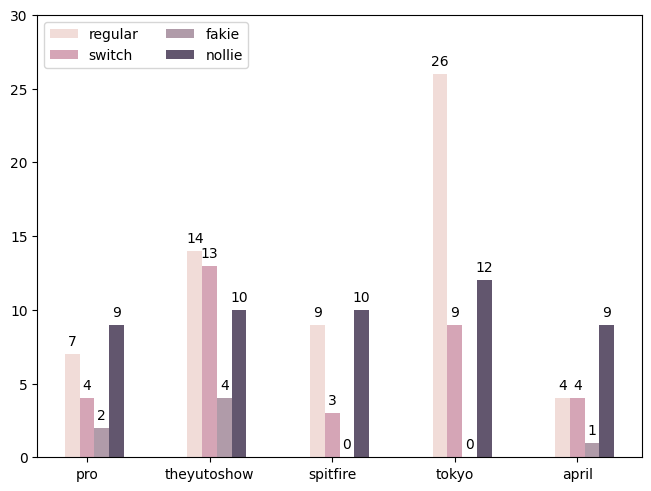

In [15]:
parts = ("pro", "theyutoshow", "spitfire", "tokyo", "april")
stances = {
    'regular':(rp, ry, rs, rt, ra),
    'switch':(sp, sy, ss, st, sa),
    'fakie':(fp, fy, fs, ft, fa),
    'nollie':(npr, ny, ns, nt, na),
}

x = np.arange(len(parts))
width = 0.12
multiplier = 0 

color=[bizarre, careyspink, londonhue, smoky]

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in stances.items():
    offset = width * multiplier
    for c in color:
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
        color.pop(0)
        break
    ax.bar_label(rects, padding=4)
    multiplier += 1

#ax.set_ylabel('Count')
#ax.set_xlabel('Video Parts')
ax.set_title('')
ax.set_xticks(x + width, parts)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 30)

plt.savefig('stancespervideo.jpg', bbox_inches='tight')

# Stances per obstacle

In [16]:
import warnings
warnings.filterwarnings('ignore')
# ignore some warning with this displot due to error within library

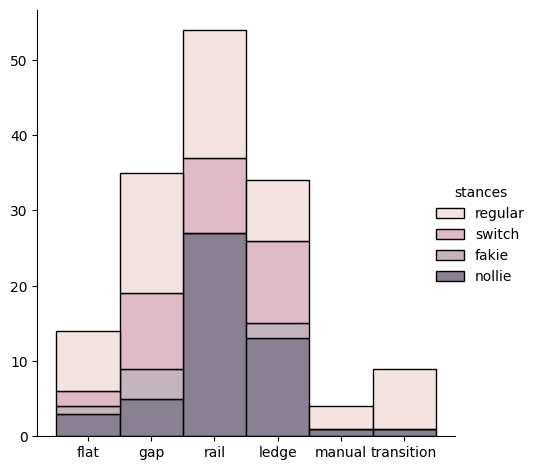

In [17]:
colors = [bizarre, careyspink, londonhue, smoky]

g = sns.displot(data=yuto_df, x='obstacle', hue="stance", multiple="stack", palette=sns.color_palette(colors, 4), facet_kws={'legend_out': True});

new_title = 'stances'
g._legend.set_title(new_title)
# replace labels
new_labels = ['regular', 'switch', 'fakie', 'nollie']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.set(ylabel='', xlabel='');

g.savefig('stancesperobstacle.jpg', bbox_inches='tight')

In [18]:
# rail tricks repeated more than once
yuto_df.loc[yuto_df['obstacle'] == 'rail', 'name'].value_counts() [:8]

name
nollie fs 180 to sw bs 5-0 to reg       2
bs lip                                  2
nollie fs nose                          2
bs crook                                2
fs feeble                               2
sw fs board                             2
nollie bs 180 to sw fs 5-0 to reg       2
nollie fs 180 to sw bs feeble to reg    2
Name: count, dtype: int64

# Kickflip vs Heelflip

In [19]:
reg_flips = len(yuto_df[(yuto_df['flip']=='flip') & (yuto_df['stance']==0)])
fakie_flips = len(yuto_df[(yuto_df['flip']=='flip') & (yuto_df['stance']==2)])
switch_flips = len(yuto_df[(yuto_df['flip']=='flip') & (yuto_df['stance']==1)])
nollie_flips = len(yuto_df[(yuto_df['flip']=='flip') & (yuto_df['stance']==3)])

reg_heels = len(yuto_df[(yuto_df['flip']=='heel') & (yuto_df['stance']==0)])
fakie_heels = len(yuto_df[(yuto_df['flip']=='heel') & (yuto_df['stance']==2)])
switch_heels = len(yuto_df[(yuto_df['flip']=='heel') & (yuto_df['stance']==1)])
nollie_heels = len(yuto_df[(yuto_df['flip']=='heel') & (yuto_df['stance']==3)])

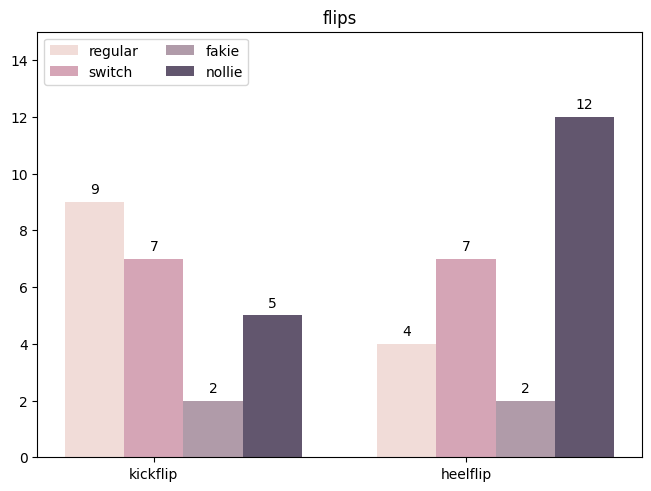

In [20]:
parts = ("kickflip", "heelflip")
stances = {
    'regular':(reg_flips, reg_heels),
    'switch':(switch_flips, switch_heels),
    'fakie':(fakie_flips, fakie_heels),
    'nollie':(nollie_flips, nollie_heels),
}

x = np.arange(len(parts))
width = 0.19
multiplier = 0 

color=[bizarre, careyspink, londonhue, smoky]

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in stances.items():
    offset = width * multiplier
    for c in color:
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
        color.pop(0)
        break
    ax.bar_label(rects, padding=4)
    multiplier += 1

#ax.set_ylabel('Count')
#ax.set_xlabel('Flips')
ax.set_title('flips')
ax.set_xticks(x + width, parts)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 15)

plt.savefig('kickvsheel.jpg', bbox_inches='tight')

# Flip ins and outs

In [21]:
kickflip_in = len(yuto_df[(yuto_df['flip']=='flip') & ((yuto_df['obstacle']=='rail') | (yuto_df['obstacle']=='ledge') | (yuto_df['obstacle']=='manual'))])
heelflip_in = len(yuto_df[(yuto_df['flip']=='heel') & ((yuto_df['obstacle']=='rail') | (yuto_df['obstacle']=='ledge') | (yuto_df['obstacle']=='manual'))])
total_flipin = len(yuto_df[((yuto_df['flip'] == 'heel') | (yuto_df['flip'] == 'flip')) & ((yuto_df['obstacle']=='rail') | (yuto_df['obstacle']=='ledge') | (yuto_df['obstacle']=='manual'))])

In [22]:
print(f'Total flip in/out: {total_flipin}')
print(f'Kickflip in/out: {kickflip_in}')
print(f'Heelfip in/out: {heelflip_in}')

Total flip in/out: 17
Kickflip in/out: 8
Heelfip in/out: 9


# Rotations

In [23]:
yuto_df['180 in'].value_counts()

180 in
yes    19
Name: count, dtype: int64

In [24]:
yuto_df['180 out'].value_counts()

180 out
yes    11
Name: count, dtype: int64

In [25]:
# figure out which obstacle is 'tes'
yuto_df.loc[yuto_df['180 out'] == 'yes'];

In [26]:
yuto_df['270 in'].value_counts()

270 in
yes    5
Name: count, dtype: int64

In [27]:
# all 270 in are rails
yuto_df.loc[yuto_df['270 in'] == 'yes'];

In [28]:
spin_in_rail = len(yuto_df[(yuto_df['180 in']=='yes') & (yuto_df['obstacle']=='rail')])
spin_out_rail = len(yuto_df[(yuto_df['180 out']=='yes') & (yuto_df['obstacle']=='rail')]) + 1

spin_in_ledge = len(yuto_df[(yuto_df['180 in']=='yes') & (yuto_df['obstacle']=='ledge')])
spin_out_ledge = len(yuto_df[(yuto_df['180 out']=='yes') & (yuto_df['obstacle']=='ledge')])

In [29]:
print(f'Rails: \n180 in: {spin_in_rail} \n180 out: {spin_out_rail}')
print(f'Ledge: \n180 in: {spin_in_ledge} \n180 out: {spin_out_ledge}')
print('270 into a rail 5 rimes')

Rails: 
180 in: 14 
180 out: 8
Ledge: 
180 in: 5 
180 out: 4
270 into a rail 5 rimes


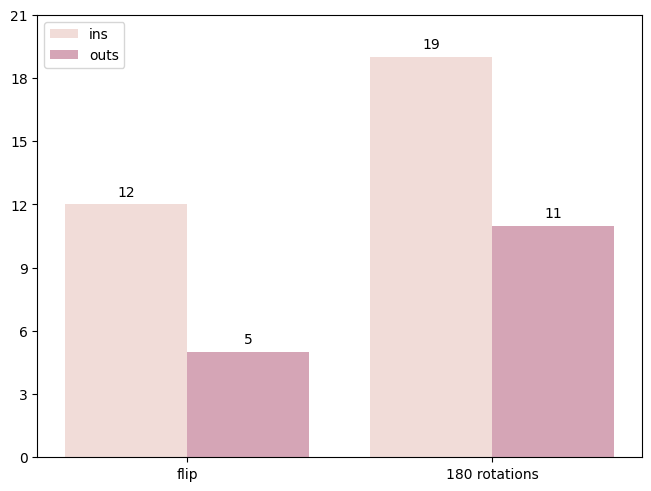

In [30]:
color = [careyspink, smoky]

parts = ("flip", "180 rotations")
stances = {
    'ins':(12, 19),
    'outs':(5, 11),
}

x = np.arange(len(parts))
width = 0.40
multiplier = 0 

color=[bizarre, careyspink, londonhue, smoky]

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in stances.items():
    offset = width * multiplier
    for c in color:
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
        color.pop(0)
        break
    ax.bar_label(rects, padding=4)
    multiplier += 1

#ax.set_ylabel('Count')
#ax.set_xlabel('Flips')
#ax.set_title('tech')
ax.set_xticks(x + width/2, parts)
ax.legend(loc='upper left', ncols=1)
#ax.set_ylim(0, 15)
ax.set_yticks([0, 3, 6, 9, 12, 15, 18, 21])


plt.show();

# Top tricks by obstacle

## Ledge

In [31]:
tricks = yuto_df.name[(yuto_df['obstacle']=='ledge')].value_counts()[:5].index.to_list()
counts = yuto_df.name[(yuto_df['obstacle']=='ledge')].value_counts()[:5].to_list()

In [32]:
print(tricks)

['bs 50', 'nollie heel bs noseslide', 'nollie nosegrind bs 180', 'sw flip bs tail shuv', 'sw fs tail to bs tail to flip']


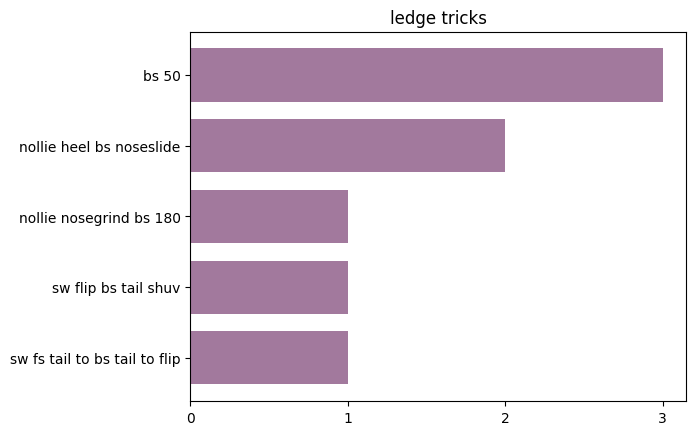

In [33]:
fig, ax = plt.subplots()

ax.barh(tricks, counts, height=0.75, color=bouqet)
ax.set_yticks(tricks, labels=tricks)
ax.invert_yaxis()
# ax.set_xlabel('Count')
ax.set_title('ledge tricks')
ax.set_xticks([0, 1, 2, 3])

plt.show()

## Gap

In [34]:
tricks = yuto_df.name[(yuto_df['obstacle']=='gap')].value_counts()[:5].index.to_list()
counts = yuto_df.name[(yuto_df['obstacle']=='gap')].value_counts()[:5].to_list()

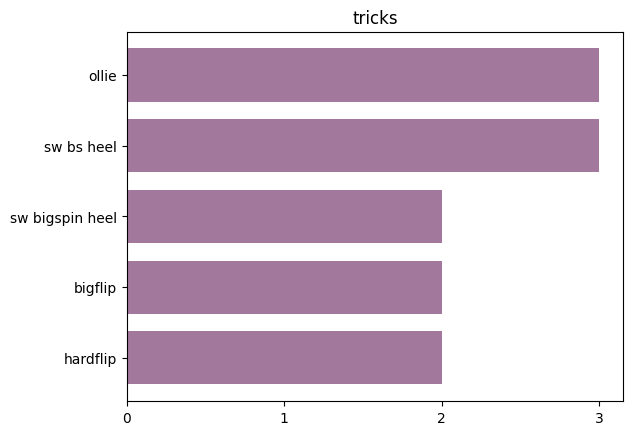

In [35]:
fig, ax = plt.subplots()

ax.barh(tricks, counts, height=0.75, color=bouqet)
ax.set_yticks(tricks, labels=tricks)
ax.invert_yaxis()
# ax.set_xlabel('Count')
ax.set_title('tricks')
ax.set_xticks([0, 1, 2, 3])

plt.show()

## Flat

In [36]:
tricks = yuto_df.name[(yuto_df['obstacle']=='flat')].value_counts()[:5].index.to_list()
counts = yuto_df.name[(yuto_df['obstacle']=='flat')].value_counts()[:5].to_list()

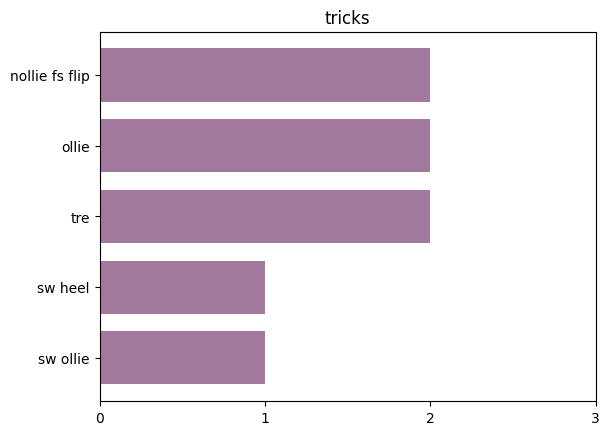

In [37]:
fig, ax = plt.subplots()

ax.barh(tricks, counts, height=0.75, color=bouqet)
ax.set_yticks(tricks, labels=tricks)
ax.invert_yaxis()
# ax.set_xlabel('Count')
ax.set_title('tricks')
ax.set_xticks([0, 1, 2, 3])

plt.show()

# ====================

# Street to contest

In [38]:
# find openers and bangers
parts = [pro_df, theyutoshow_df, spitfire_df, tokyo_df, april_df]
for t in parts:
    pass
    # print(t.iloc[-5:,-2:])
    
# use to find where trick was done
# contest_df.loc[contest_df['name'].str.contains('trick name')]

In [39]:
contest_df.section.value_counts()

section
run           122
best trick     30
Name: count, dtype: int64

# Run Section Tricks

In [40]:
# figure tricks repeated more than once
contest_df.name[contest_df['section'] == 'run'].value_counts() [:25]

name
nollie fs 270 to sw bs lip              13
treflip                                 11
nollie bs 270 to bs board                7
bs 360                                   4
bs tail                                  4
sw fs tail                               4
nollie bs 180 to sw fs 50                4
bs smith                                 3
nollie fs 180 heel                       3
treflip fs 50                            3
nollie bs 270 to bs nose                 3
fs tail                                  3
nollie bs 180 to sw fs feeble            2
bs disaster                              2
fs smith                                 2
fs feeble                                2
sw fs 180 to bs crook                    2
nollie fs 270 to sw fs board             2
nollie fs noseblunt                      2
nollie fs 180 to sw bs feeble to reg     2
bigspin fs board                         2
fs blunt                                 2
nollie bs noseblunt                      2
nollie

In [41]:
unique_runtricks = len(contest_df.name[contest_df['section'] == 'run'].unique())
total_runtricks = len(contest_df.name[contest_df['section'] == 'run'])
print(f'Unique run tricks: {unique_runtricks} \nTotal run tricks: {total_runtricks}')

Unique run tricks: 59 
Total run tricks: 122


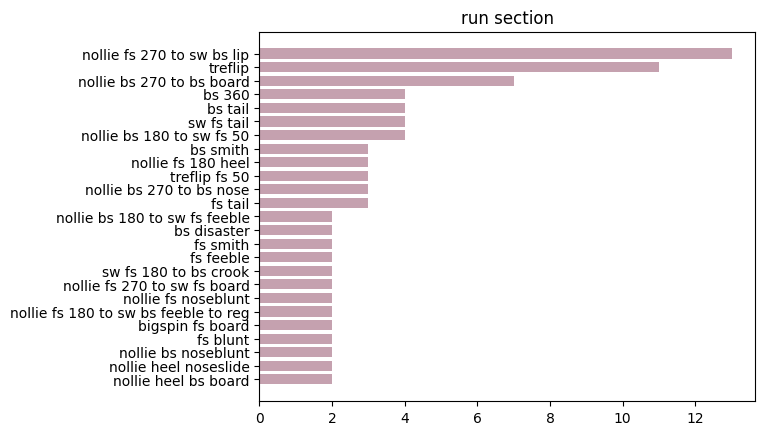

In [42]:
fig, ax = plt.subplots()

tricks = contest_df.name[contest_df['section'] == 'run'].value_counts()[:25].index.to_list()
counts = contest_df.name[contest_df['section'] == 'run'].value_counts()[:25].to_list()

ax.barh(tricks, counts, height=0.75, color=lily)
ax.set_yticks(tricks, labels=tricks)
ax.invert_yaxis()
# ax.set_xlabel('Count')
ax.set_title('run section')

plt.savefig('contestruns.jpg', bbox_inches='tight')

In [43]:
# tricks done in best trick section
contest_df.name[contest_df['section'] == 'best trick'].value_counts()

name
nollie bs 270 to bs nose                         7
nollie fs 270 to sw bs tail                      4
nollie fs 180 to sw bs 5-0 to reg                4
nollie bs 270 to bs board                        3
nollie bs 180 to sw fs feeble                    2
sw treflip fs lip                                2
nollie bs 270 to bs nose to 270 out              2
nollie fs 270 to sw bs tail to sw bigspin out    1
sw fs 180 to alley-oop bs 5-0                    1
nollie bs 180 to sw fs smith                     1
nollie bigspin bs tail                           1
sw fs 180 to bs feeble                           1
nollie fs noseblunt                              1
Name: count, dtype: int64

In [44]:
unique_besttricks = len(contest_df.name[contest_df['section'] == 'best trick'].unique())
total_besttricks = len(contest_df.name[contest_df['section'] == 'best trick'])
print(f'Unique best tricks: {unique_besttricks} \nTotal best tricks: {total_besttricks}')

Unique best tricks: 13 
Total best tricks: 30


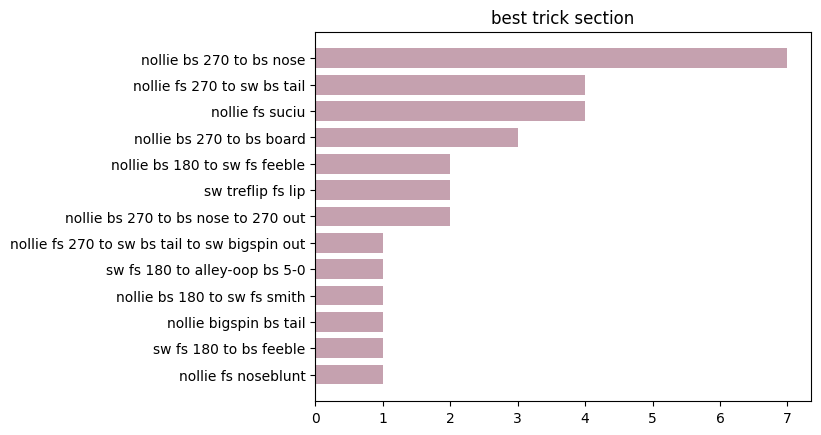

In [45]:
fig, ax = plt.subplots()

tricks = contest_df.name[contest_df['section'] == 'best trick'].value_counts().index.to_list()
counts = contest_df.name[contest_df['section'] == 'best trick'].value_counts().to_list()

i = tricks.index('nollie fs 180 to sw bs 5-0 to reg')
tricks[i] = 'nollie fs suciu'

ax.barh(tricks, counts, height=0.75, color=lily)
ax.set_yticks(tricks, labels=tricks)
ax.invert_yaxis()
#ax.set_xlabel('Count')
ax.set_title('best trick section')

plt.savefig('contestbest.jpg', bbox_inches='tight')

# Stances per obstacle

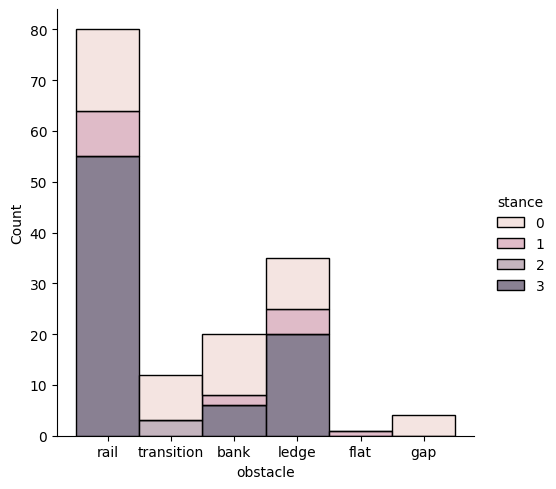

In [57]:
colors = [bizarre, careyspink, londonhue, smoky]

sns.displot(data=contest_df, x='obstacle', hue="stance", multiple="stack", palette=sns.color_palette(colors, 4));

plt.savefig('contest_stanceperobstacle.jpg', bbox_inches='tight')

Stances of rail across 5 video parts

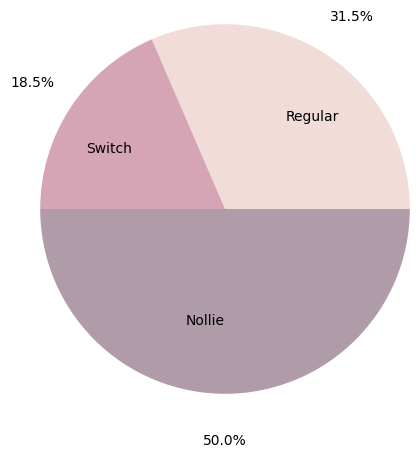

In [47]:
labels = 'Regular', 'Switch', 'Nollie'
sizes = [len(yuto_df[(yuto_df['stance']==0) & (yuto_df['obstacle']=='rail')]),
          len(yuto_df[(yuto_df['stance']==1) & (yuto_df['obstacle']=='rail')]),
          len(yuto_df[(yuto_df['stance']==3) & (yuto_df['obstacle']=='rail')])
        ]
pie_color = [bizarre, careyspink, londonhue]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6, radius=1.25, colors=pie_color)

plt.show();

Stances of rail in contest

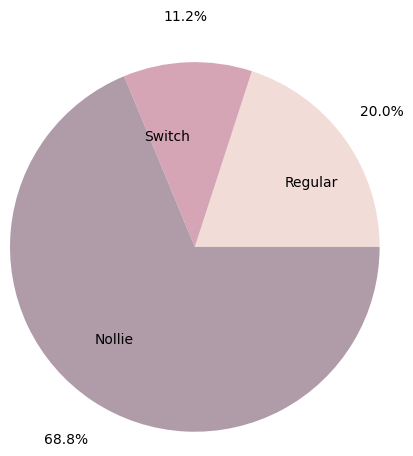

In [48]:
labels = 'Regular', 'Switch', 'Nollie'
sizes = [len(contest_df[(contest_df['stance']==0) & (contest_df['obstacle']=='rail')]),
          len(contest_df[(contest_df['stance']==1) & (contest_df['obstacle']=='rail')]),
          len(contest_df[(contest_df['stance']==3) & (contest_df['obstacle']=='rail')])
        ]
pie_color = [bizarre, careyspink, londonhue]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6, radius=1.25, colors=pie_color)

plt.show();

Stances in contest

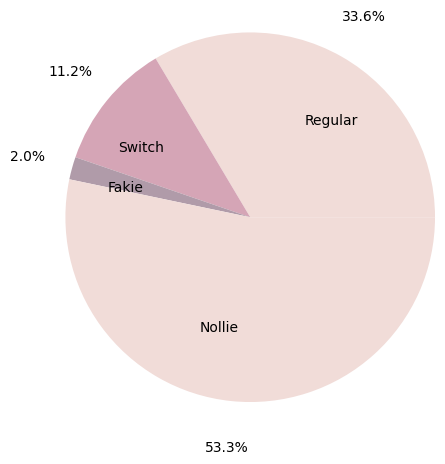

In [49]:
labels = 'Regular', 'Switch', 'Fakie', 'Nollie'
sizes = [len(contest_df[(contest_df['stance']==0)]),
          len(contest_df[(contest_df['stance']==1)]),
          len(contest_df[(contest_df['stance']==2)]),
          len(contest_df[(contest_df['stance']==3)])
        ]
pie_color = [bizarre, careyspink, londonhue]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6, radius=1.25, colors=pie_color)

plt.show();

# Rotations

In [50]:
total_rail_ledge = len(contest_df[(contest_df['obstacle']=='ledge') | (contest_df['obstacle']=='rail')])
print(f'Total rail and ledge: {total_rail_ledge}')

Total rail and ledge: 115


In [51]:
contest_df['180 in'].value_counts()

180 in
yes    25
Name: count, dtype: int64

In [52]:
contest_df['180 out'].value_counts()

180 out
yes    10
Name: count, dtype: int64

In [53]:
contest_df['270 in'].value_counts()

270 in
yes    43
Name: count, dtype: int64

In [54]:
spin_in_rail = len(contest_df[(contest_df['180 in']=='yes') & (contest_df['obstacle']=='rail')])
spin_out_rail = len(contest_df[(contest_df['180 out']=='yes') & (contest_df['obstacle']=='rail')])

spin_in_ledge = len(contest_df[(contest_df['180 in']=='yes') & (contest_df['obstacle']=='ledge')])
spin_out_ledge = len(contest_df[(contest_df['180 out']=='yes') & (contest_df['obstacle']=='ledge')])

yutornado_rail = len(contest_df[(contest_df['270 in']=='yes') & (contest_df['obstacle']=='rail')])
yutornado_ledge = len(contest_df[(contest_df['270 in']=='yes') & (contest_df['obstacle']=='ledge')])

In [55]:
print(f'Rails: \n180 in: {spin_in_rail} \n180 out: {spin_out_rail} \n270 in: {yutornado_rail}\n')
print(f'Ledge: \n180 in: {spin_in_ledge} \n180 out: {spin_out_ledge} \n270 in: {yutornado_ledge}') 

Rails: 
180 in: 10 
180 out: 7 
270 in: 35

Ledge: 
180 in: 13 
180 out: 2 
270 in: 8


In [56]:
# figure out 180 in and out and for what obstacles 
contest_df.loc[(contest_df['180 in']=='yes') & (contest_df['180 out']=='yes')];

# ====================